# Title

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import os
os.chdir("..")

In [2]:
df = pd.read_stata("116320-V2\\ADH-WWD-AERi-Data-Corrected\\Public Release Data\\dta\\workfile9014wwd.dta")
cols = ["czone", "statefip","yr", "t2", "timepwt24", "d_impusch_p9", "d_impuschm_p9cen", "d_impuschf_p9cen", "d_impotch_p9_lag", ]
filtered_elements = [element for element in df.columns if "reg" in element]
cols+= filtered_elements
true_df = df[cols]
true_df

,czone,statefip,yr,t2,timepwt24,d_impusch_p9,d_impuschm_p9cen,d_impuschf_p9cen,d_impotch_p9_lag,reg_midatl,reg_encen,reg_wncen,reg_satl,reg_escen,reg_wscen,reg_mount,reg_pacif
0,100.0,47,1990.0,0.0,0.002114,1.368996,0.853212,0.515783,1.214706,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,100.0,47,2000.0,1.0,0.002894,2.170298,1.234350,0.935948,2.525805,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,200.0,47,1990.0,0.0,0.000732,2.093069,1.274826,0.818244,1.506115,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,200.0,47,2000.0,1.0,0.001142,2.604384,1.606744,0.997641,3.109452,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,301.0,47,1990.0,0.0,0.000261,1.977159,1.226143,0.751015,0.813720,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,39302.0,53,2000.0,1.0,0.000846,0.501683,0.298361,0.203321,0.539953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1440,39303.0,53,1990.0,0.0,0.000309,0.203265,0.137203,0.066062,0.141234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1441,39303.0,53,2000.0,1.0,0.000459,0.217105,0.146042,0.071063,0.219764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1442,39400.0,53,1990.0,0.0,0.012741,0.907547,0.533567,0.373981,0.378374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
df_2 = pd.read_stata("116320-V2\\ADH-WWD-AERi-Data-Corrected\\Public Release Data\\dta\\workfile_china.dta")

cols_2 = ["czone","d_avg_lnwkwage", "d_avg_lnwkwage_m", "d_avg_lnwkwage_f"]
cols_2 +=["l_shind_manuf_cbp", "l_sh_popedu_c", "l_sh_popfborn", "l_sh_empl_f", "l_sh_routine33", "l_task_outsource"]
meging_on = df_2[cols_2]
true_df = true_df.merge(right=meging_on, left_on=true_df.index, right_on=meging_on.index)
true_df.drop("key_0",axis=1,inplace=True)
true_df.to_stata("data2019.dta")
""" mapping = {
    "czone_x": "czone",
    "t2": "After",
    "timepwt24": "CZ weight by period Length", 
    "d_impusch_p9": "CZ China Import Exposure",
    "d_impuschm_p9cen": "CZ China Import Exposure Male",
    "d_impuschf_p9cen": "CZ China Import Exposure Female",
    "d_impotch_p9_lag": "Instrument Other Developed Countries imports China",
    "d_avg_lnwkwage": "Log Weekly Avg Wage",
    "d_avg_lnwkwage_m": "Log Weekly Avg Wage Male",
    "d_avg_lnwkwage_f": "Log Weekly Avg Wage Female",
}
true_df.rename(mapper=mapping, axis=1,inplace=True) """
true_df

,czone_x,statefip,yr,t2,timepwt24,d_impusch_p9,d_impuschm_p9cen,d_impuschf_p9cen,d_impotch_p9_lag,reg_midatl,...,czone_y,d_avg_lnwkwage,d_avg_lnwkwage_m,d_avg_lnwkwage_f,l_shind_manuf_cbp,l_sh_popedu_c,l_sh_popfborn,l_sh_empl_f,l_sh_routine33,l_task_outsource
0,100.0,47,1990.0,0.0,0.002114,1.368996,0.853212,0.515783,1.214706,0.0,...,100.0,11.314535,8.091927,16.929960,39.787476,33.884003,1.065476,57.659035,31.322742,-0.174807
1,100.0,47,2000.0,1.0,0.002894,2.170298,1.234350,0.935948,2.525805,0.0,...,100.0,1.880373,0.321320,5.592074,29.703432,42.118324,1.789442,60.514069,31.796432,-0.668905
2,200.0,47,1990.0,0.0,0.000732,2.093069,1.274826,0.818244,1.506115,0.0,...,200.0,6.335258,0.958824,14.564991,42.233002,31.591215,0.965240,57.389729,29.615757,-0.132126
3,200.0,47,2000.0,1.0,0.001142,2.604384,1.606744,0.997641,3.109452,0.0,...,200.0,0.935486,-1.682622,5.594458,30.815619,34.165863,3.485157,59.977715,31.869707,-0.382597
4,301.0,47,1990.0,0.0,0.000261,1.977159,1.226143,0.751015,0.813720,0.0,...,301.0,4.452181,1.653051,10.382938,33.025658,26.137537,0.752831,46.720547,28.812309,-0.427937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,39302.0,53,2000.0,1.0,0.000846,0.501683,0.298361,0.203321,0.539953,0.0,...,39302.0,-2.977235,-3.285613,-2.540452,15.105149,63.824886,12.261012,66.534142,29.666033,-0.133045
1440,39303.0,53,1990.0,0.0,0.000309,0.203265,0.137203,0.066062,0.141234,0.0,...,39303.0,10.134029,4.436827,20.702648,21.871569,47.785984,4.538155,56.382107,26.858339,-0.496753
1441,39303.0,53,2000.0,1.0,0.000459,0.217105,0.146042,0.071063,0.219764,0.0,...,39303.0,-5.384173,-8.482320,0.495093,13.631065,57.584846,6.137667,60.407291,28.428104,-0.890851
1442,39400.0,53,1990.0,0.0,0.012741,0.907547,0.533567,0.373981,0.378374,0.0,...,39400.0,15.652132,13.225651,20.508671,20.711973,60.187061,9.662724,67.012947,32.512493,0.238079


In [4]:
cz_shapefile  = gpd.read_file("counties00.shp")
cz_shapefile

,FIPS,GISJOIN2,ERS00,OUT00,REP00,Pop00,Wage2000,Wage2001,Wage2002,Wage2003,Wage2004,Wage2005,BEA2004,geometry
0,10001.0,1000010,180,98,454.0,126697,27062.0,27754.0,29818.0,30861.0,32358.0,33132.0,49,"POLYGON ((2062981.03 -325179.333, 2063212.086 ..."
1,10003.0,1000030,196,99,454.0,500265,40685.0,42849.0,44244.0,45803.0,47533.0,50482.0,127,"MULTIPOLYGON (((2064082.876 -267052.237, 20650..."
2,10005.0,1000050,180,98,454.0,156638,24852.0,25706.0,26518.0,27774.0,28947.0,30089.0,49,"POLYGON ((2136047.471 -403237.69, 2135753.012 ..."
3,1001.0,0100010,60,1,581.0,43671,25200.0,25577.0,26332.0,26450.0,27551.0,27586.0,114,"POLYGON ((1272010.229 -1262888.866, 1272323.57..."
4,1003.0,0100030,254,2,582.0,140415,22713.0,23447.0,24352.0,25025.0,26208.0,27740.0,112,"POLYGON ((1166031.654 -1436986.212, 1166179.32..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,9007.0,0900070,78,97,453.0,155071,38768.0,40490.0,41377.0,42759.0,45235.0,45979.0,72,"POLYGON ((2229551.391 6182.143, 2230273.837 65..."
3137,9009.0,0900090,78,97,453.0,824008,38124.0,39483.0,40207.0,41534.0,43007.0,43931.0,118,"POLYGON ((2198085.776 -4897.831, 2198969.807 -..."
3138,9011.0,0900110,78,97,453.0,259088,36721.0,38505.0,38650.0,39680.0,41443.0,42151.0,72,"POLYGON ((2250511.198 22238.802, 2250672.52 22..."
3139,9013.0,0900130,78,97,453.0,136364,32443.0,34430.0,34709.0,34144.0,35150.0,36837.0,72,"POLYGON ((2247029.562 58824.253, 2249647.995 5..."


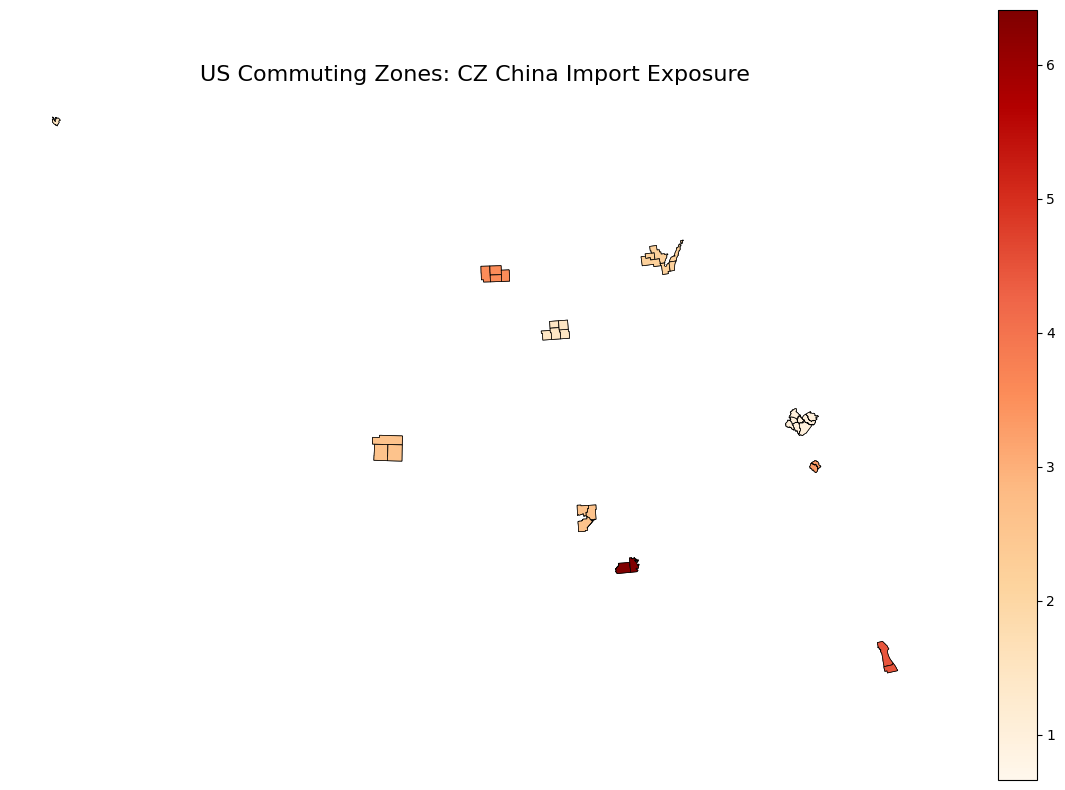

In [9]:
data = true_df

# Step 3: Merge the shapefile with your data
# Adjust the column names as needed: here we assume the shapefile has a column 'CZ_ID'
merged = cz_shapefile.merge(data, left_on='ERS00', right_on='czone_x')

# Step 4: Create the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='d_impusch_p9',  # Column to visualize
            ax=ax, 
            legend=True, 
            cmap='OrRd',                # Choose an appropriate color map
            edgecolor='black',          # Optional: adds borders for clarity
            linewidth=0.5)

ax.set_title("US Commuting Zones: CZ China Import Exposure", fontsize=16)
ax.set_axis_off()  # Optional: Hide the axis for a cleaner map

plt.show()